# Интернет-магазин «Стримчик»

# План действий

# Шаг 1. Откроем файл с данными и изучите общую информацию

Путь к файлу: /datasets/games.csv. Скачать датасет

# Шаг 2. Подготовим данные

- Заменим названия столбцов (приведём нижнему регистру);

- Преобразуем данные в нужные типы. Опишим, в каких столбцах заменили тип данных и почему;

- Обработаем пропуски при необходимости:

- Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.

# Шаг 3. Проведём исследовательский анализ данных

- Посмотрим, сколько игр выпускалось в разные годы;

- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам;

- Возьмем данные за соответствующий актуальный период;

- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ;

- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам;

- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы;

- Посмотрим на общее распределение игр по жанрам;

# Шаг 4. Составим  портрет пользователя каждого региона

- Определим для пользователя каждого региона (NA, EU, JP):

    - Самые популярные платформы (топ-5);
    - Самые популярные жанры (топ-5);
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе. 
    
# Шаг 5. Проверим  гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- Зададим пороговое значение alpha.


# Описание проекта
 
 Из открытых источников интернет-магазина "Стримчик" доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Выявим определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

-Name — название игры

-Platform — платформа

-Year_of_Release — год выпуска

-Genre — жанр игры

-NA_sales — продажи в Северной Америке (миллионы проданных копий)

-EU_sales — продажи в Европе (миллионы проданных копий)

-JP_sales — продажи в Японии (миллионы проданных копий)

-Other_sales — продажи в других странах (миллионы проданных копий)

-Critic_Score — оценка критиков (максимум 100)

-User_Score — оценка пользователей (максимум 10)

-Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Шаг 1. 

Откроем файл с данными и изучим общую информацию

Путь к файлу: /datasets/games.csv

In [1]:
#импонтируем библиоте
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Названия нужно привести к одному регистру, года привести в порядок

In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Шаг 2. Подготовим данные


In [6]:
#приведем столбцы к нижнему регистру
games.columns.tolist()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [7]:
cols = ['game_name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']
games.set_axis(cols, axis='columns', inplace=True)

In [8]:
#Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
games.head()


,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E,82.54
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E,35.52
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [9]:
games.info()#приведем данные к нужным типам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


In [10]:
games['year_of_release'].isna().sum()

269

In [11]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [12]:
games = games.dropna(subset=['year_of_release'])

In [13]:
games['year_of_release'].isna().sum()

0

In [14]:
games['year_of_release'] = games['year_of_release'].astype('int')

In [15]:
games['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [16]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [17]:
games[games['user_score'] == 'tbd']['year_of_release'].value_counts()

2009    405
2010    331
2008    326
2011    217
2007    192
2002    192
2006    124
2005    121
2004    107
2003     95
2001     82
2000     43
2015     38
2016     34
2012     24
2014     21
2013     15
1999      8
1997      1
Name: year_of_release, dtype: int64

In [18]:
games[games['user_score'] == 'tbd']['user_score'].describe()

count     2376
unique       1
top        tbd
freq      2376
Name: user_score, dtype: object

In [19]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan

In [20]:
games['user_score'] = games['user_score'].astype('float')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16446 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [21]:
#посмотрим дубликаты
games.duplicated().sum()

0

In [22]:
games.isnull().sum().sort_values(ascending = False)

user_score         8983
critic_score       8463
rating             6678
game_name             2
genre                 2
platform              0
year_of_release       0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
total_sales           0
dtype: int64

In [23]:
games['user_score'] = games['user_score'].fillna(-1)#что бы не смешались с нулевыми оценками
games['critic_score'] = games['critic_score'].fillna(-1)#что бы не смешались с нулевыми оценками
games['rating'] = games['rating'].fillna('out of rating')
games = games.dropna(subset=['game_name'])#удалили пропуски
games = games.dropna(subset=['genre'])#удалили пропуски

In [24]:
games.isnull().sum().sort_values(ascending = False)

game_name          0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

In [25]:
games.tail()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.00,-1.00,out of rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.00,-1.00,out of rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.00,-1.00,out of rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.00,-1.00,out of rating,0.01
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,-1.00,-1.00,out of rating,0.01


Пропуски могли появится от незнания при заполнении жанра или названия игры. Так как рейтинг ESRB-это рейтинг для США и Канады, пропуск не савязан с ошибкой заполнения данных, просто не только для Северной Америки выпускаются игры.

In [26]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = games.copy() 
list_c = ['game_name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-------------------------')
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
game_name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores

# Шаг 3. Проведём исследовательский анализ данных


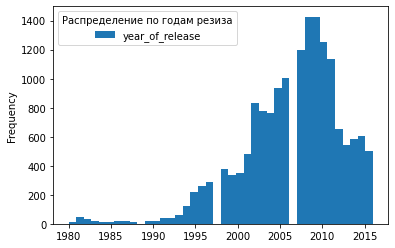

In [27]:
ax = games['year_of_release'].plot(kind='hist', bins=40).legend()
ax.set_title('Распределение по годам резиза')


появились игры в 80х, но выпускалось их очень мало из-за мощностей, в 90х плавно начинают расти выходы игр и к 2008 достигают самого пика, далее идет резкий спад видимо из-за перенасыщения рынка

Text(0, 0.5, 'total_sales')

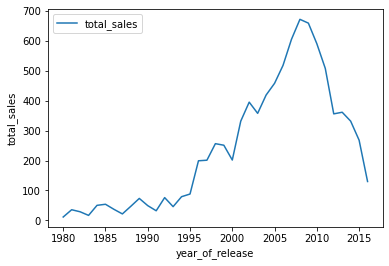

In [28]:
games.groupby('year_of_release').agg({'total_sales': 'sum'}).plot()
plt.ylabel('total_sales')


In [29]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [30]:
#посмотрим выпуски игр по платформам
most_popular_platform = games.groupby('platform').agg({'game_name': 'count'}).reset_index()
most_popular_platform.sort_values(by='game_name', ascending=False).head(10)


,platform,game_name
16,PS2,2127
4,DS,2121
17,PS3,1306
26,Wii,1286
28,X360,1232
19,PSP,1193
15,PS,1190
13,PC,957
6,GBA,811
29,XB,803


Text(0, 0.5, 'platform')

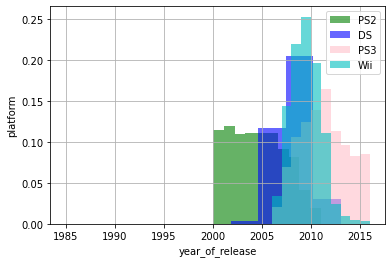

In [31]:
games.loc[games['platform'] == 'PS2','year_of_release'].hist(bins=10, alpha=0.6, color='g', label='PS2', density=True)
games.loc[games['platform'] == 'DS','year_of_release'].hist(bins=10, alpha=0.6, color='blue', label='DS', density=True)
games.loc[games['platform'] == 'PS3','year_of_release'].hist(bins=10, alpha=0.6, color='pink', label='PS3', density=True)
games.loc[games['platform'] == 'Wii','year_of_release'].hist(bins=10, alpha=0.6, color='c', label='Wii', density=True)
plt.legend()

plt.xlabel('year_of_release')
plt.ylabel('platform')



По выпуску игр побеждает PS2 и с небольшим отрывом DS, на 3м месте PS3 на 4м Wii.Платформы плавно перетекают из года в год и сменяют друг друга, возможно есть потолок по выпуску с дальнейшим переименованием платформы, как с PS2, которую явно переименовали в PS3 и добавили обнов.Данные по годам важныб так как мы видим закономерность в плавности переходна из одной платформы на другую.У всех есть пик выпуска, потом резкий спад и скорее всего после этого переименование.

Text(0, 0.5, 'platform')

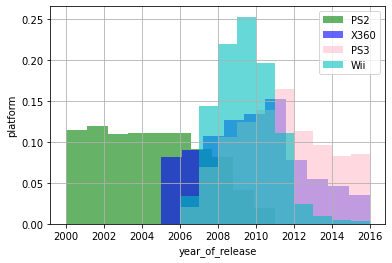

In [32]:
games.loc[games['platform'] == 'PS2','year_of_release'].hist(bins=10, alpha=0.6, color='g', label='PS2', density=True)
games.loc[games['platform'] == 'X360','year_of_release'].hist(bins=10, alpha=0.6, color='blue', label='X360', density=True)
games.loc[games['platform'] == 'PS3','year_of_release'].hist(bins=10, alpha=0.6, color='pink', label='PS3', density=True)
games.loc[games['platform'] == 'Wii','year_of_release'].hist(bins=10, alpha=0.6, color='c', label='Wii', density=True)
plt.legend()

plt.xlabel('year_of_release')
plt.ylabel('platform')


По продажам так же, есть пиковый показатель по продажам, зетем резкий спад, графики с выпусками и продажами очень схожи, выпустили игру,продали, доработали платформу и переименовали.Скорее всего срок работы платформы около 10 лет


In [33]:
#посмотрим продажи по платформам
sum_games_platform = games[games['year_of_release'] > 2012].groupby('platform').agg({'total_sales': 'sum'}).reset_index()
sum_games_platform.sort_values(by='total_sales', ascending=False).head(10)

,platform,total_sales
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.25
9,X360,136.80
8,WiiU,64.63
2,PC,39.43
6,PSV,32.99
7,Wii,13.66
5,PSP,3.50


In [34]:
games[games['year_of_release'] == 2016]['platform'].unique()#Посмотрим актуальные платформы на 2016 год

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

In [35]:
#посмотрим самые прибыльные платформы после 2012  года, что бы выбрать актуальные на 2017 год платформы. Выберем 5 самых прибыльных
print(games[games['year_of_release'] > 2012].head(15))


                                    game_name platform  year_of_release  \
16                         Grand Theft Auto V      PS3             2013   
23                         Grand Theft Auto V     X360             2013   
31                  Call of Duty: Black Ops 3      PS4             2015   
33                        Pokemon X/Pokemon Y      3DS             2013   
42                         Grand Theft Auto V      PS4             2014   
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
60                       Call of Duty: Ghosts     X360             2013   
69                       Call of Duty: Ghosts      PS3             2013   
72                                  Minecraft     X360             2013   
77                                    FIFA 16      PS4             2015   
87               Star Wars Battlefront (2015)      PS4             2015   
92             Call of Duty: Advanced Warfare      PS4             2014   
94                       

будем рассматривать актуальный период с 2012 года , что бы были актуальными платформы на 2017год. Выберем 5 платформ функцианирующих в 2016 год. XOne,X360,PS3,3DS и PS4,они подходят для анализа к 2017 году, так как примерный срок работы платформ 10 лет.

Text(0, 0.5, 'PS4')

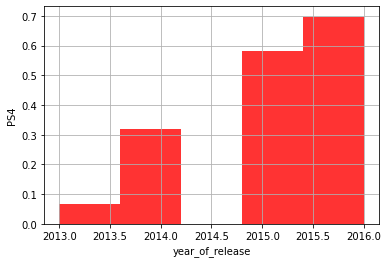

In [36]:
#Посмотрим как выглядят на графике актуальные с 2012 года платформы
games[games['year_of_release'] > 2012].loc[games['platform'] == 'PS4','year_of_release'].hist(bins=5, alpha=0.8, color='red', label='PS4', density=True)

plt.xlabel('year_of_release')
plt.ylabel('PS4')


Text(0, 0.5, '3DS')

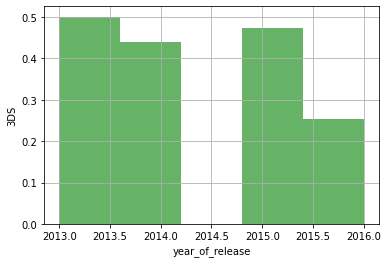

In [37]:
games[games['year_of_release'] > 2012].loc[games['platform'] == '3DS','year_of_release'].hist(bins=5, alpha=0.6, color='g', label='3DS', density=True)
plt.xlabel('year_of_release')
plt.ylabel('3DS')

Text(0, 0.5, 'PS3')

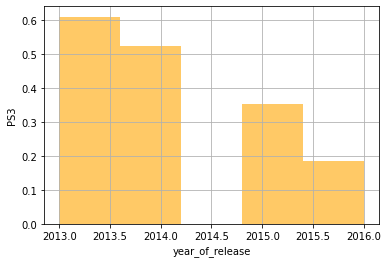

In [38]:
games[games['year_of_release'] > 2012].loc[games['platform'] == 'PS3','year_of_release'].hist(bins=5, alpha=0.6, color='orange', label='PS3', density=True)
plt.xlabel('year_of_release')
plt.ylabel('PS3')

Text(0, 0.5, 'XOne')

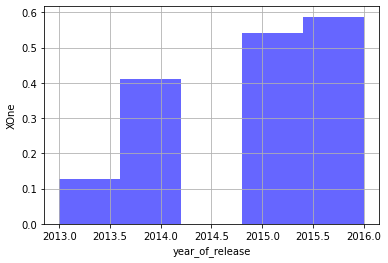

In [39]:
games[games['year_of_release'] > 2012].loc[games['platform'] == 'XOne','year_of_release'].hist(bins=5, alpha=0.6, color='blue', label='Wii', density=True)
plt.xlabel('year_of_release')
plt.ylabel('XOne')

Text(0, 0.5, 'X360')

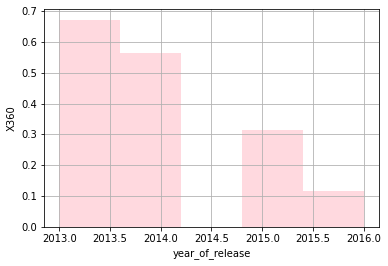

In [40]:
games[games['year_of_release'] > 2012].loc[games['platform'] == 'X360','year_of_release'].hist(bins=5, alpha=0.6, color='pink', label='X360', density=True)
plt.xlabel('year_of_release')
plt.ylabel('X360')

Посмотрев график, у платформ X360 и PS3 резкий спад, у PS4 и XOne дела идут стремительно вверх, 3DS держится стабильно примерно в одном диапазоне, на  PS4 и XOne большая вероятность хорошо зарабатывать в 2017 году


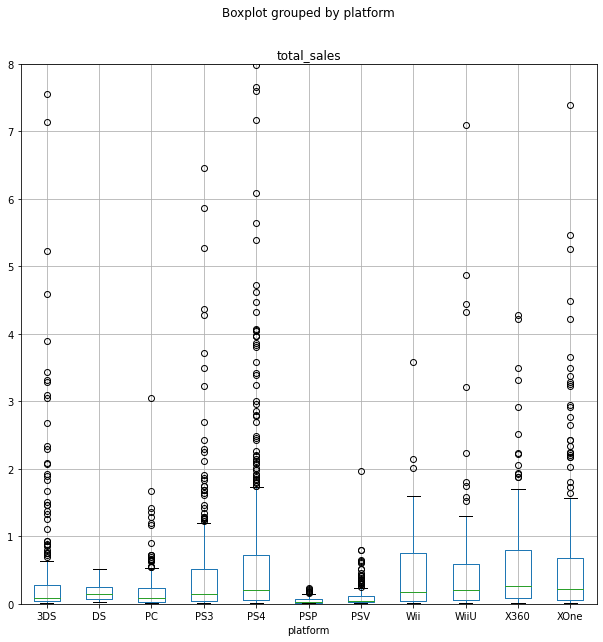

In [41]:
plot = games[games['year_of_release'] > 2012].boxplot('total_sales',by='platform', figsize=(10,10)).set_ylim(0, 8)

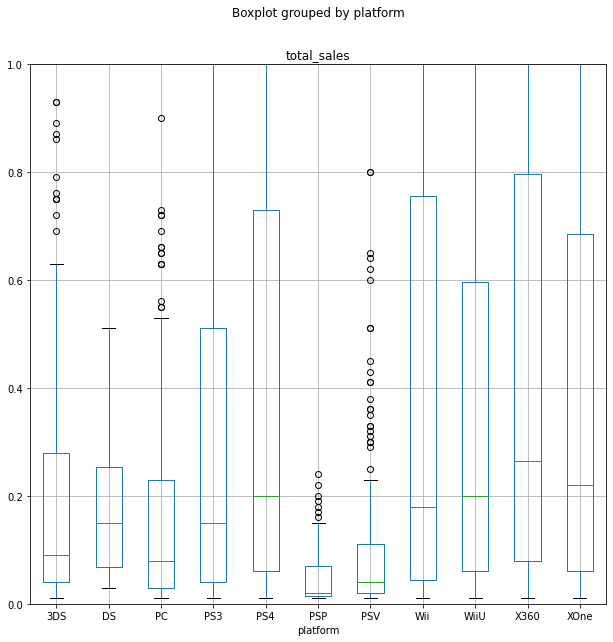

In [42]:
#посмотрим медианные и максимальные значения для платформ после 2008 года
plot = games[games['year_of_release'] > 2012].boxplot('total_sales',by='platform', figsize=(10,10)).set_ylim(0, 1)



После 2016 года, на диаграмме размаха можно выделить 5 платформ по самым высоким медианным значениям и максимальным показателям, X360, XOne, WiiU,PS4, и Wii 


In [43]:
#посмотрим на показатели начиная с 2008 года
total_genre = games[games['year_of_release'] > 2012].groupby('platform')['total_sales']
total_genre.describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.00,0.47,1.38,0.01,0.04,0.09,0.28,14.60
DS,8.00,0.19,0.17,0.03,0.07,0.15,0.25,0.51
PC,189.00,0.21,0.35,0.01,0.03,0.08,0.23,3.05
PS3,345.00,0.53,1.45,0.01,0.04,0.15,0.51,21.05
PS4,392.00,0.80,1.61,0.01,0.06,0.20,0.73,14.63
PSP,67.00,0.05,0.06,0.01,0.01,0.02,0.07,0.24
PSV,358.00,0.09,0.15,0.01,0.02,0.04,0.11,1.96
Wii,23.00,0.59,0.92,0.01,0.04,0.18,0.76,3.58
WiiU,115.00,0.56,1.04,0.01,0.06,0.20,0.60,7.09


In [44]:
#Посмотрим на актуальный год 
total_genre = games[games['year_of_release'] == 2016].groupby('platform')['total_sales']
total_genre.describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,46.00,0.33,1.06,0.01,0.03,0.08,0.21,7.14
PC,54.00,0.10,0.14,0.01,0.02,0.04,0.12,0.65
PS3,38.00,0.09,0.12,0.01,0.03,0.07,0.12,0.73
PS4,164.00,0.42,0.97,0.01,0.03,0.08,0.35,7.60
PSV,85.00,0.05,0.06,0.01,0.02,0.03,0.06,0.30
Wii,1.00,0.18,NaN,0.18,0.18,0.18,0.18,0.18
WiiU,14.00,0.33,0.35,0.01,0.05,0.21,0.41,1.03
X360,13.00,0.12,0.11,0.02,0.04,0.10,0.12,0.38
XOne,87.00,0.30,0.55,0.01,0.02,0.06,0.28,2.65


На нынешний 2016 год выделяются 5 платформы, 3DS, PS4, WiiU, X360, Wii, посморим на графике WiiU и Wii и еще PC и PSV

Text(0, 0.5, 'WiiU')

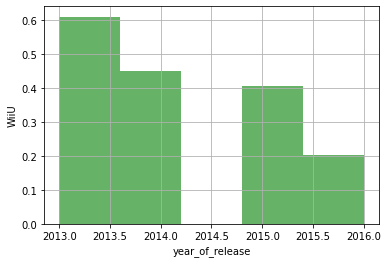

In [45]:
games[games['year_of_release'] > 2012].loc[games['platform'] == 'WiiU','year_of_release'].hist(bins=5, alpha=0.6, color='g', label='WiiU', density=True)
plt.xlabel('year_of_release')
plt.ylabel('WiiU')

Text(0, 0.5, 'Wii')

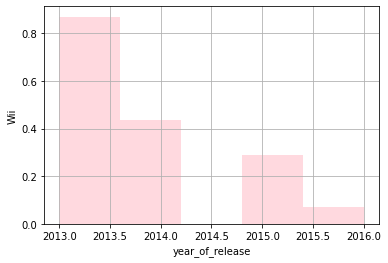

In [46]:
games[games['year_of_release'] > 2012].loc[games['platform'] == 'Wii','year_of_release'].hist(bins=5, alpha=0.6, color='pink', label='XOne', density=True)
plt.xlabel('year_of_release')
plt.ylabel('Wii')

Text(0, 0.5, 'PC')

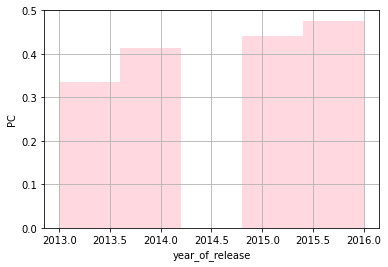

In [47]:
games[games['year_of_release'] > 2012].loc[games['platform'] == 'PC','year_of_release'].hist(bins=5, alpha=0.6, color='pink', label='PC', density=True)
plt.xlabel('year_of_release')
plt.ylabel('PC')

Text(0, 0.5, 'PSV')

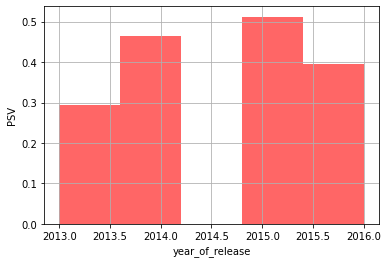

In [48]:
games[games['year_of_release'] > 2012].loc[games['platform'] == 'PSV','year_of_release'].hist(bins=5, alpha=0.6, color='red', label='PSV', density=True)
plt.xlabel('year_of_release')
plt.ylabel('PSV')

PC на 3м месте по росту к 2017 году

 В 2017 году PS4, XOne, PC  и PSV должны приносить хорошую прибыль

<AxesSubplot:xlabel='user_score', ylabel='critic_score'>

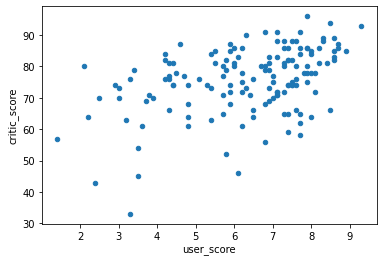

In [49]:
games[(games['platform'] == 'PC') & (games['user_score'] != -1) & (games['critic_score'] != -1) & (games['year_of_release'] > 2012)].plot(x ='user_score', y='critic_score', kind='scatter')


на диаграмме рассеяния платформы PC показано, что у пользовательский отзывах и критиков положительная корреляция, с ростом одной величины растет и другая 

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

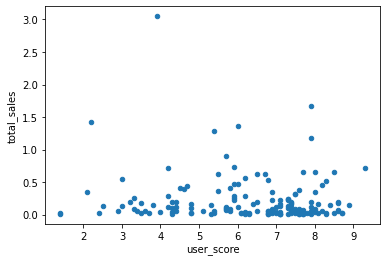

In [50]:
games[(games['platform'] == 'PC') & (games['user_score'] != -1) & (games['year_of_release'] > 2012)].plot(x ='user_score', y='total_sales', kind='scatter')


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

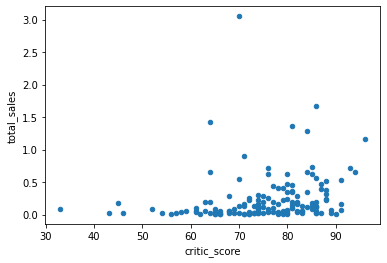

In [51]:
games[(games['platform'] == 'PC') & (games['critic_score'] != -1) & (games['year_of_release'] > 2012)].plot(x ='critic_score', y='total_sales', kind='scatter')

Лучшие продажи на платформе PSV, когда оценки пользователей от 3 до 9 баллов, а критиков от  60 до 90 баллов

<AxesSubplot:xlabel='user_score', ylabel='critic_score'>

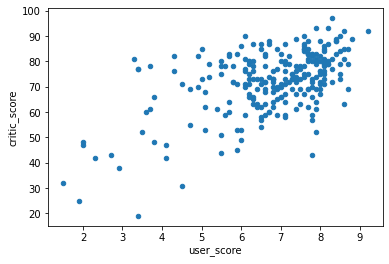

In [52]:
games[(games['platform'] == 'PS4') & (games['user_score'] != -1) & (games['critic_score'] != -1) & (games['year_of_release'] > 2012)].plot(x ='user_score', y='critic_score', kind='scatter')


на диаграмме рассеяния платформы PS4 показано, что у пользовательский отзывах и критиков корреляция положительная 

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

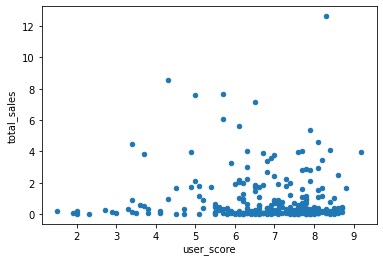

In [53]:
games[(games['platform'] == 'PS4') & (games['user_score'] != -1) & (games['year_of_release'] > 2012)].plot(x ='user_score', y='total_sales', kind='scatter')

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

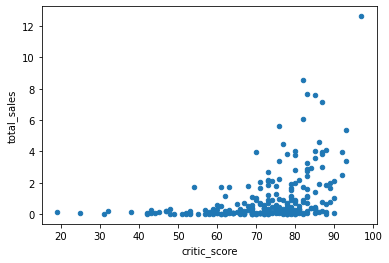

In [54]:
games[(games['platform'] == 'PS4') & (games['critic_score'] != -1) & (games['year_of_release'] > 2012)].plot(x ='critic_score', y='total_sales', kind='scatter')

У платформы PS4 самые большие продажи, когда оценки пользователей от 5.5 до 8.8, а критиков от 57 до 90

<AxesSubplot:xlabel='user_score', ylabel='critic_score'>

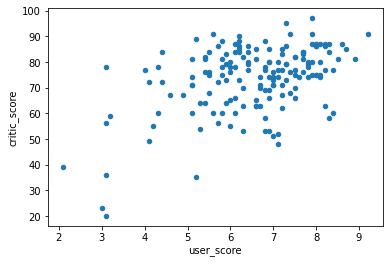

In [55]:
games[(games['platform'] == 'XOne') & (games['user_score'] != -1) & (games['critic_score'] != -1) & (games['year_of_release'] > 2012)].plot(x ='user_score', y='critic_score', kind='scatter')

На платформе XOne у отзывов критиков и пользователей корреляция положительная 

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

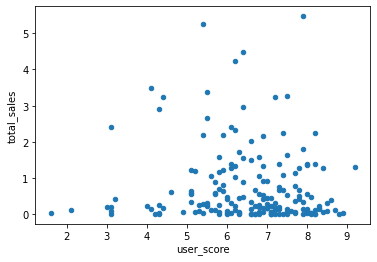

In [56]:
games[(games['platform'] == 'XOne') & (games['user_score'] != -1) & (games['year_of_release'] > 2012)].plot(x ='user_score', y='total_sales', kind='scatter')

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

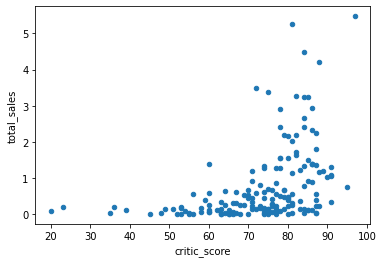

In [57]:
games[(games['platform'] == 'XOne') & (games['critic_score'] != -1) & (games['year_of_release'] > 2012)].plot(x ='critic_score', y='total_sales', kind='scatter')

Продажи хорошие на платформе XOne, когда оценки пользователей от 5.2 до 9 и  критиков от 52 до 88

<AxesSubplot:xlabel='user_score', ylabel='critic_score'>

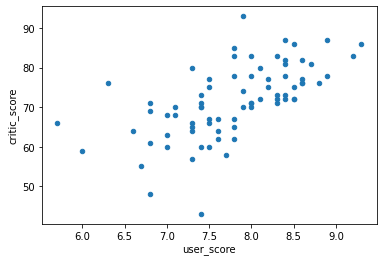

In [58]:
games[(games['platform'] == 'PSV') & (games['user_score'] != -1) & (games['critic_score'] != -1) & (games['year_of_release'] > 2012)].plot(x ='user_score', y='critic_score', kind='scatter')

На платформе PSV у оценок пользователей и критиков положительная корреляция

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

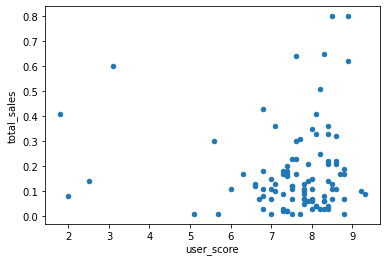

In [59]:
games[(games['platform'] == 'PSV') & (games['user_score'] != -1) & (games['year_of_release'] > 2012)].plot(x ='user_score', y='total_sales', kind='scatter')

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

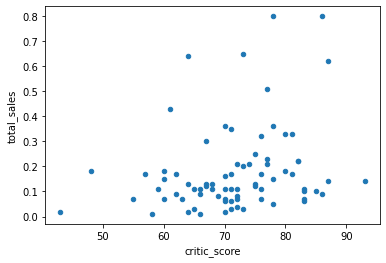

In [60]:
games[(games['platform'] == 'PSV') & (games['critic_score'] != -1) & (games['year_of_release'] > 2012)].plot(x ='critic_score', y='total_sales', kind='scatter')

На платформе PSV лучшие продажи, когда оценки пользователей от 6.4 до 7.8, а оценки пользователей от 68 до 88

<AxesSubplot:xlabel='user_score', ylabel='critic_score'>

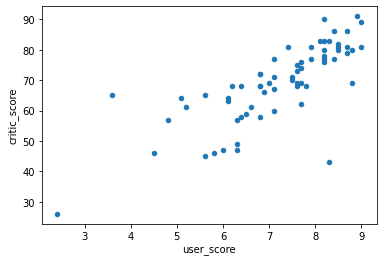

In [61]:
games[(games['platform'] == '3DS') & (games['user_score'] != -1) & (games['critic_score'] != -1) & (games['year_of_release'] > 2012)].plot(x ='user_score', y='critic_score', kind='scatter')

На платформе 3DS у отзывов критиков и пользователей положительная корреляция, с ростом одной величины, растет и другая

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

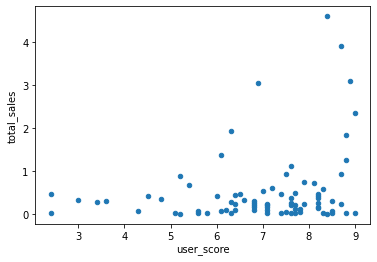

In [62]:
games[(games['platform'] == '3DS') & (games['user_score'] != -1) & (games['year_of_release'] > 2012)].plot(x ='user_score', y='total_sales', kind='scatter')

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

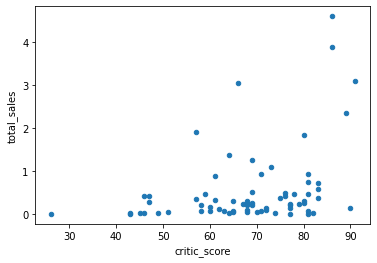

In [63]:
games[(games['platform'] == '3DS') & (games['critic_score'] != -1) & (games['year_of_release'] > 2012)].plot(x ='critic_score', y='total_sales', kind='scatter')

На плаформе 3DS самые лучшие продажи, когда оценки пользователей от 6 до 9, а оценки критиков от 57 до 83 баллов

In [64]:
print(((games['user_score'] != -1) & (games['year_of_release'] > 2012)).corr(games['total_sales']))

0.025247434283666013


In [65]:
print(((games['critic_score'] != -1) & (games['year_of_release'] > 2012)).corr(games['total_sales']))

0.030123999468030134


Проанализировали популярные на данный период платформы:

1)PSV - оценки критиков влияющие на продажу от 68 до 88, оценки пользователей от 6.4 до 7.8;

2)PS4 - оценки критиков влияющие на продажу от 57 до 90, оценки пользователей от 5.5 до 8.8;

3)3DS - оценки критиков влияющие на продажу от 57 до 83, оценки пользователей от 6 до 9;

4)XOne - оценки критиков влияющие на продажу от 52 до 88, оценки пользователей от 5.2 до 9;

5)PSV - оценки критиков влияющие на продажу от 68 до 88, оценки пользователей от 6.4 до 7.8;

Оценки критиков и пользователей по платформам, влияющие на покупку почти совпадают. От оценок зависит выручка.

In [66]:
total_genre = games[games['year_of_release'] > 2012].groupby('genre')['total_sales']
total_genre.describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,766.00,0.42,1.25,0.01,0.03,0.11,0.34,21.05
Adventure,245.00,0.10,0.22,0.01,0.02,0.03,0.07,1.66
Fighting,80.00,0.44,1.05,0.01,0.06,0.12,0.32,7.55
Misc,155.00,0.41,1.01,0.01,0.03,0.10,0.33,9.18
Platform,74.00,0.58,0.81,0.01,0.09,0.22,0.63,4.32
Puzzle,17.00,0.19,0.33,0.01,0.02,0.06,0.11,1.19
Racing,85.00,0.47,0.96,0.01,0.05,0.12,0.38,7.09
Role-Playing,292.00,0.50,1.35,0.01,0.06,0.12,0.38,14.60
Shooter,187.00,1.25,2.01,0.01,0.14,0.45,1.43,14.63


In [67]:
game_genre = games[games['year_of_release'] > 2012].groupby('total_sales').agg({'genre': 'sum'}).reset_index()
game_genre.sort_values(by='total_sales',ascending=False).head(20)

,total_sales,genre
386,21.05,Action
385,16.27,Action
384,14.63,Shooter
383,14.60,Role-Playing
382,12.62,Action
381,11.68,Role-Playing
380,10.24,Shooter
379,9.36,Shooter
378,9.18,Misc
377,8.58,Sports


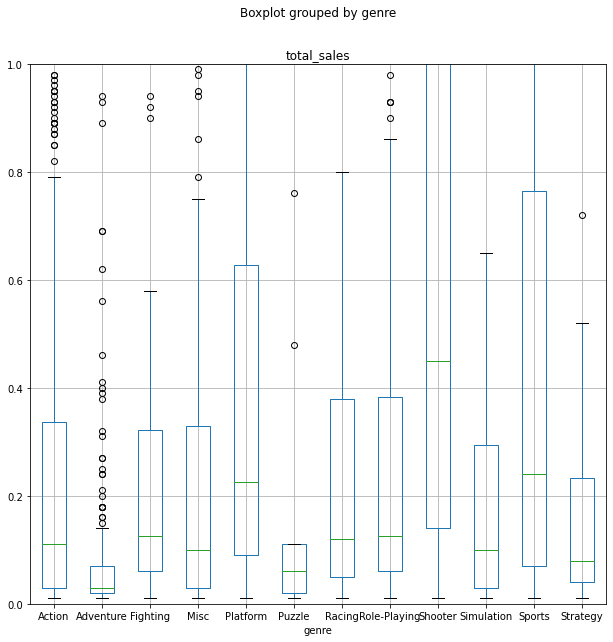

In [68]:
plot = games[games['year_of_release'] > 2012].boxplot('total_sales',by='genre', figsize=(10,10)).set_ylim(0, 1)


На графике видим 3 выделяющихся жанра Shooter, Sports и Platform. Медианные значения у жанра Shooter самые высокие 0.45, Platform 0.22 и Sports 0.24. Мы нашли 3 самых стабильных жанра с самыми высокими медианными значениями



# Шаг 4. Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

 -Самые популярные платформы (топ-5). Опишите различия в долях продаж.

 -Самые популярные жанры (топ-5). Поясните разницу.

 -Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<AxesSubplot:xlabel='platform'>

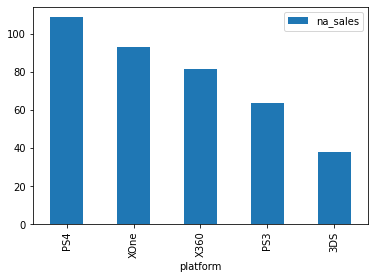

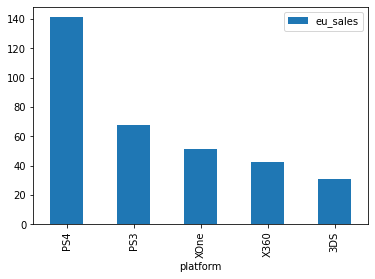

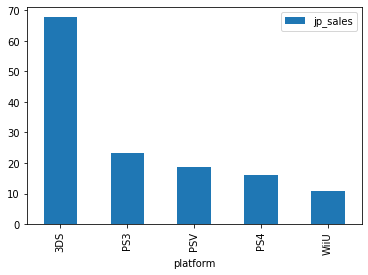

In [69]:
#посмотрим на топ-5 платформ и жанров с 2008 года 
games[games['year_of_release'] > 2012].groupby(by='platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
games[games['year_of_release'] > 2012].groupby(by='platform').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games[games['year_of_release'] > 2012].groupby(by='platform').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')


In [70]:
def sales_na(row):
    if row['platform'] == 'X360':
        return 'X360'
    if row['platform'] =='PS3':
        return 'PS3'
    if row['platform'] == 'XOne':
        return 'XOne'
    if row['platform'] == '3DS':
        return '3DS'
    if row['platform'] == 'PS4':
        return 'PS4'
    return 'другие'


In [71]:
games['sales_na'] = games.apply(sales_na, axis=1)

In [72]:
games[games['year_of_release'] > 2012].groupby('sales_na').agg({'na_sales': 'sum'}).sort_values(by='sales_na')


,na_sales
sales_na,
3DS,38.20
PS3,63.50
PS4,108.74
X360,81.66
XOne,93.12
другие,52.49


In [73]:
def sales_eu(row):
    if row['platform'] == 'X360':
        return 'X360'
    if row['platform'] =='PS3':
        return 'PS3'
    if row['platform'] == 'XOne':
        return 'XOne'
    if row['platform'] == '3DS':
        return '3DS'
    if row['platform'] == 'PS4':
        return 'PS4'
    return 'другие'


In [74]:
games['sales_eu'] = games.apply(sales_eu, axis=1)

In [75]:
games[games['year_of_release'] > 2012].groupby('sales_eu').agg({'eu_sales':'sum'}).sort_values(by='sales_eu')


,eu_sales
sales_eu,
3DS,30.96
PS3,67.81
PS4,141.09
X360,42.52
XOne,51.59
другие,58.26


In [76]:
def sales_jp(row):
    if row['platform'] == '3DS':
        return '3DS'
    if row['platform'] =='PS4':
        return 'PS4'
    if row['platform'] == 'PSV':
        return 'PSV'
    if row['platform'] == 'PS3':
        return 'PS3'
    if row['platform'] == 'WiiU':
        return 'WiiU'
    return 'другие'


In [77]:
games['sales_jp'] = games.apply(sales_jp, axis=1)

In [78]:
games[games['year_of_release'] > 2012].groupby('sales_jp').agg({'jp_sales':'sum'}).sort_values(by='sales_jp')


,jp_sales
sales_jp,
3DS,67.81
PS3,23.35
PS4,15.96
PSV,18.59
WiiU,10.88
другие,4.19


Text(0.5, 1.0, 'ТОП-5 платформ по странам')

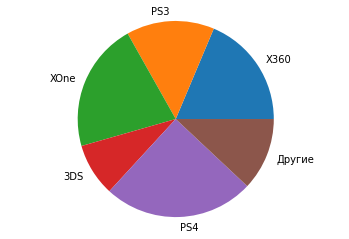

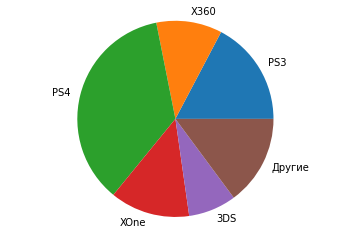

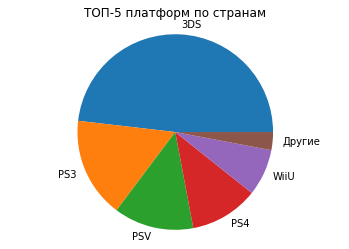

In [79]:
labels = ['X360', 'PS3', 'XOne', '3DS', 'PS4', 'Другие']
vals = [81.66, 63.5, 93.12, 38.2, 108.74, 52.49]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")
labels = ['PS3', 'X360', 'PS4', 'XOne', '3DS', 'Другие']
vals = [67.81, 42.52, 141.09, 51.59, 30.96, 58.26]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")
labels = ['3DS', 'PS3', 'PSV', 'PS4', 'WiiU', 'Другие']
vals = [67.81, 23.35, 18.59, 15.96, 10.88, 4.19]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")
ax.set_title('ТОП-5 платформ по странам')

Самые популярные платформы после 2012 года являются PS4 в Америке и Европе, 3DS в Японии

<AxesSubplot:xlabel='genre'>

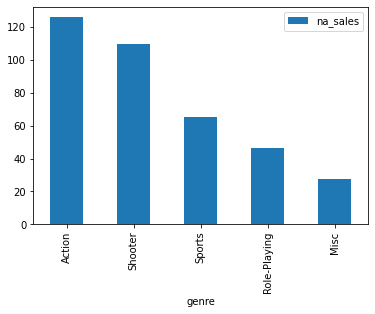

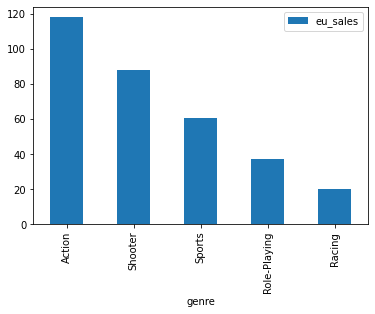

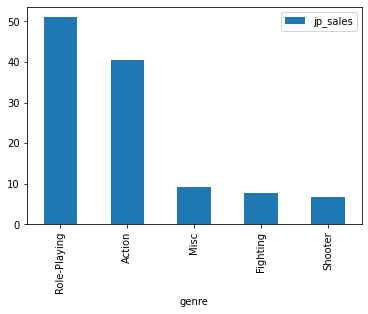

In [80]:
games[games['year_of_release'] > 2012].groupby(by='genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
games[games['year_of_release'] > 2012].groupby(by='genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games[games['year_of_release'] > 2012].groupby(by='genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

In [81]:
def genre_na(row):
    if row['genre'] == 'Action':
        return 'Action'
    if row['genre'] =='Sports':
        return 'Sports'
    if row['genre'] == 'Shooter':
        return 'Shooter'
    if row['genre'] == 'Role-Playing':
        return 'Role-Playing'
    if row['genre'] == 'Misc':
        return 'Misc'
    return 'Другой'

In [82]:
games['genre_na'] = games.apply(genre_na, axis=1)

In [83]:
games[games['year_of_release'] > 2012].groupby('genre_na').agg({'na_sales':'sum'}).sort_values(by='na_sales')

,na_sales
genre_na,
Misc,27.49
Role-Playing,46.40
Другой,62.76
Sports,65.27
Shooter,109.74
Action,126.05


In [84]:
def genre_eu(row):
    if row['genre'] == 'Action':
        return 'Action'
    if row['genre'] =='Sports':
        return 'Sports'
    if row['genre'] == 'Shooter':
        return 'Shooter'
    if row['genre'] == 'Role-Playing':
        return 'Role-Playing'
    if row['genre'] == 'Racing':
        return 'Racing'
    return 'Другой'

In [85]:
games['genre_eu'] = games.apply(genre_eu, axis=1)

In [86]:
games[games['year_of_release'] > 2012].groupby('genre_eu').agg({'eu_sales':'sum'}).sort_values(by='eu_sales')

,eu_sales
genre_eu,
Racing,20.19
Role-Playing,36.97
Sports,60.52
Другой,68.56
Shooter,87.86
Action,118.13


In [87]:
def genre_jp(row):
    if row['genre'] == 'Action':
        return 'Action'
    if row['genre'] =='Fighting':
        return 'Fighting'
    if row['genre'] == 'Role-Playing':
        return 'Role-Playing'
    if row['genre'] == 'Misc':
        return 'Misc'
    if row['genre'] == 'Shooter':
        return 'Shooter'
    return 'Другой'

In [88]:
games['genre_jp'] = games.apply(genre_jp, axis=1)

In [89]:
games[games['year_of_release'] > 2012].groupby('genre_jp').agg({'jp_sales':'sum'}).sort_values(by='jp_sales')

,jp_sales
genre_jp,
Shooter,6.61
Fighting,7.65
Misc,9.20
Другой,25.79
Action,40.49
Role-Playing,51.04


Text(0.5, 1.0, 'ТОП-5 жанров по странам')

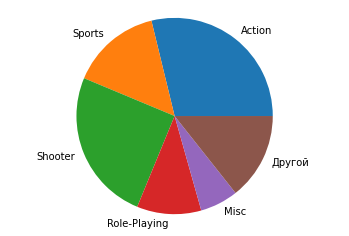

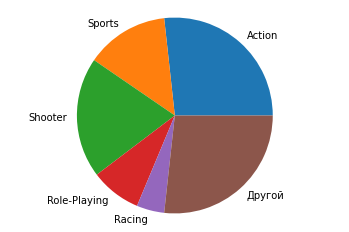

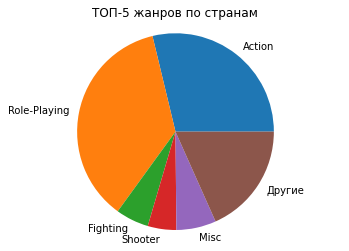

In [90]:
lab = ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Misc', 'Другой']
val = [126.05, 65.27, 109.74, 46.4, 27.49, 62.76]
fig, ax = plt.subplots()
ax.pie(val, labels=lab)
ax.axis("equal")
lab = ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Racing', 'Другой']
val = [118.13, 60.52, 87.86, 36.97, 20.19, 118.13]
fig, ax = plt.subplots()
ax.pie(val, labels=lab)
ax.axis("equal")
lab = ['Action', 'Role-Playing', 'Fighting', 'Shooter', 'Misc', 'Другие']
val = [40.49, 51.04, 7.65, 6.61, 9.2, 25.79]
fig, ax = plt.subplots()
ax.pie(val, labels=lab)
ax.axis("equal")
ax.set_title('ТОП-5 жанров по странам')

Самые популярные жанры с 2012 года это Action,Shooter(Европа, Америка) и Role_Playing(Япония)

Сравним как поменялись предпочтения на нынешний 2016 год

<AxesSubplot:xlabel='platform'>

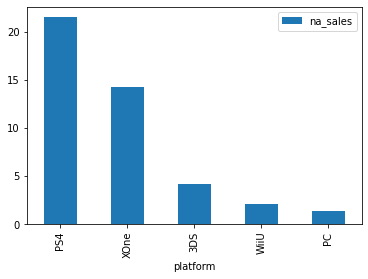

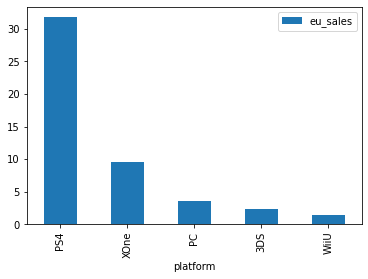

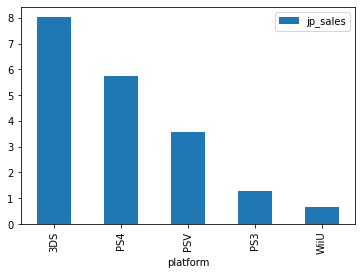

In [91]:
games[games['year_of_release'] == 2016].groupby(by='platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
games[games['year_of_release'] == 2016].groupby(by='platform').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games[games['year_of_release'] == 2016].groupby(by='platform').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')


In [92]:
def sales_na(row):
    if row['platform'] == 'PS4':
        return 'PS4'
    if row['platform'] =='XOne':
        return 'XOne'
    if row['platform'] == '3DS':
        return '3DS'
    if row['platform'] == 'WiiU':
        return 'WiiU'
    if row['platform'] == 'PC':
        return 'PC'
    return 'другие'



In [93]:
games['sales_na'] = games.apply(sales_na, axis=1)


In [94]:
games[games['year_of_release'] == 2016].groupby('sales_na').agg({'na_sales': 'sum'}).sort_values(by='sales_na')


,na_sales
sales_na,
3DS,4.14
PC,1.36
PS4,21.49
WiiU,2.10
XOne,14.27
другие,1.57


In [95]:
def sales_eu(row):
    if row['platform'] == 'XOne':
        return 'XOne'
    if row['platform'] =='PS4':
        return 'PS4'
    if row['platform'] == 'WiiU':
        return 'WiiU'
    if row['platform'] == 'PC':
        return 'PC'
    if row['platform'] == '3DS':
        return '3DS'
    return 'другие'


In [96]:
games['sales_eu'] = games.apply(sales_eu, axis=1)


In [97]:
games[games['year_of_release'] == 2016].groupby('sales_eu').agg({'eu_sales':'sum'}).sort_values(by='sales_eu')

,eu_sales
sales_eu,
3DS,2.33
PC,3.53
PS4,31.78
WiiU,1.48
XOne,9.63
другие,2.47


In [98]:
def sales_jp(row):
    if row['platform'] == '3DS':
        return '3DS'
    if row['platform'] =='PS4':
        return 'PS4'
    if row['platform'] == 'PSV':
        return 'PSV'
    if row['platform'] == 'PS3':
        return 'PS3'
    if row['platform'] == 'WiiU':
        return 'WiiU'
    return 'другие'


In [99]:
games['sales_jp'] = games.apply(sales_jp, axis=1)

In [100]:
games[games['year_of_release'] == 2016].groupby('sales_jp').agg({'jp_sales':'sum'}).sort_values(by='sales_jp')


,jp_sales
sales_jp,
3DS,8.03
PS3,1.30
PS4,5.74
PSV,3.56
WiiU,0.67
другие,0.01


Text(0.5, 1.0, 'ТОП-5 платформ по странам')

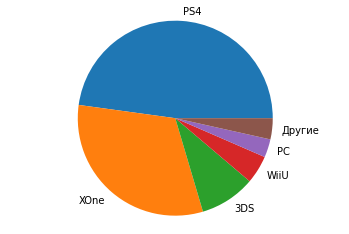

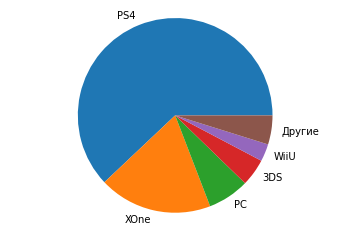

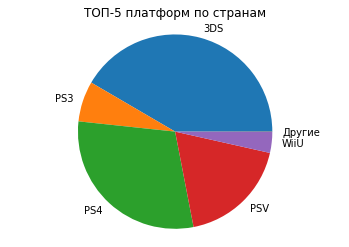

In [101]:
labels = ['PS4', 'XOne', '3DS', 'WiiU', 'PC', 'Другие']
vals = [21.49, 14.27, 4.14, 2.1, 1.36, 1.57]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")
labels = ['PS4', 'XOne', 'PC', '3DS', 'WiiU', 'Другие']
vals = [31.78, 9.63, 3.53, 2.33, 1.48, 2.47 ]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")
labels = ['3DS', 'PS3', 'PS4', 'PSV', 'WiiU', 'Другие']
vals = [8.03, 1.3, 5.74, 3.56, 0.67, 0.01]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")
ax.set_title('ТОП-5 платформ по странам')


<AxesSubplot:xlabel='genre'>

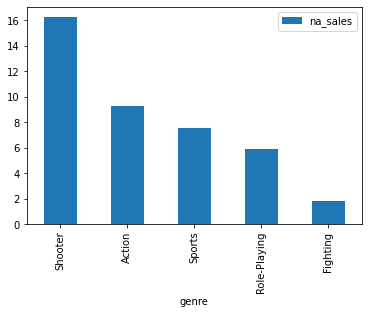

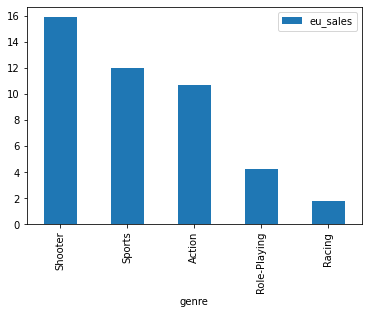

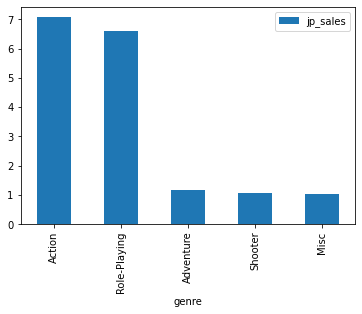

In [102]:
games[games['year_of_release'] == 2016].groupby(by='genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
games[games['year_of_release'] == 2016].groupby(by='genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games[games['year_of_release'] == 2016].groupby(by='genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')


In [103]:
def genre_na(row):
    if row['genre'] == 'Action':
        return 'Action'
    if row['genre'] =='Sports':
        return 'Sports'
    if row['genre'] == 'Shooter':
        return 'Shooter'
    if row['genre'] == 'Role-Playing':
        return 'Role-Playing'
    if row['genre'] == 'Fighting':
        return 'Fighting'
    return 'Другой'


In [104]:
games['genre_na'] = games.apply(genre_na, axis=1)

In [105]:
games[games['year_of_release'] == 2016].groupby('genre_na').agg({'na_sales':'sum'}).sort_values(by='na_sales')


,na_sales
genre_na,
Fighting,1.84
Другой,4.13
Role-Playing,5.89
Sports,7.54
Action,9.29
Shooter,16.24


In [106]:
def genre_eu(row):
    if row['genre'] == 'Action':
        return 'Action'
    if row['genre'] =='Sports':
        return 'Sports'
    if row['genre'] == 'Shooter':
        return 'Shooter'
    if row['genre'] == 'Racing':
        return 'Racing'
    if row['genre'] == 'Role-Playing':
        return 'Role-Playing'
    return 'Другой'

games['genre_eu'] = games.apply(genre_eu, axis=1)


In [107]:
games[games['year_of_release'] == 2016].groupby('genre_eu').agg({'eu_sales':'sum'}).sort_values(by='eu_sales')


,eu_sales
genre_eu,
Racing,1.77
Role-Playing,4.28
Другой,6.58
Action,10.68
Sports,12.01
Shooter,15.90


In [108]:
def genre_jp(row):
    if row['genre'] == 'Action':
        return 'Action'
    if row['genre'] =='Adventure':
        return 'Adventure'
    if row['genre'] == 'Role-Playing':
        return 'Role-Playing'
    if row['genre'] == 'Misc':
        return 'Misc'
    if row['genre'] == 'Shooter':
        return 'Shooter'
    return 'Другой'

games['genre_jp'] = games.apply(genre_jp, axis=1)


In [109]:
games[games['year_of_release'] == 2016].groupby('genre_jp').agg({'jp_sales':'sum'}).sort_values(by='jp_sales')


,jp_sales
genre_jp,
Misc,1.04
Shooter,1.06
Adventure,1.18
Другой,2.35
Role-Playing,6.61
Action,7.07


Text(0.5, 1.0, 'ТОП-5 жанров по странам')

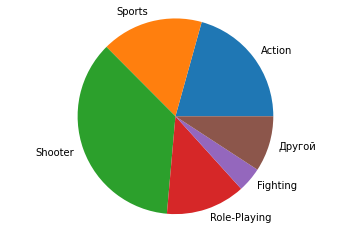

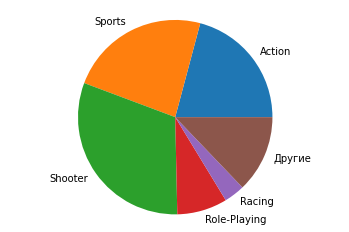

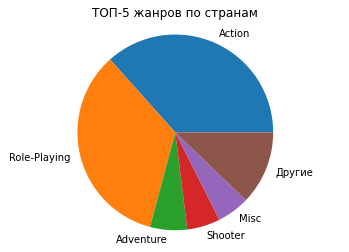

In [110]:
lab = ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Fighting', 'Другой']
val = [9.29, 7.54, 16.24, 5.89, 1.84, 4.13]
fig, ax = plt.subplots()
ax.pie(val, labels=lab)
ax.axis("equal")
lab = ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Racing', 'Другие']
val = [10.68, 12.01, 15.9, 4.28, 1.77, 6.58]
fig, ax = plt.subplots()
ax.pie(val, labels=lab)
ax.axis("equal")
lab = ['Action', 'Role-Playing', 'Adventure', 'Shooter', 'Misc', 'Другие']
val = [7.07, 6.61, 1.18, 1.06, 1.04, 2.35]
fig, ax = plt.subplots()
ax.pie(val, labels=lab)
ax.axis("equal")
ax.set_title('ТОП-5 жанров по странам')


Проанализировав ТОП-5 платформ на 2016 год по странам, выделились 3 лидера PS4(во всех странах), XOne(Америка и Европа) и 3DS(лидер в Японии). Проанализировав ТОП-5 жанров на 2016 год, выделились 4 фаворита Shooter(США и Европа), Action(во всех), Role-Playing(2е место в Японии),Sports(США,Европа) 


<AxesSubplot:xlabel='rating'>

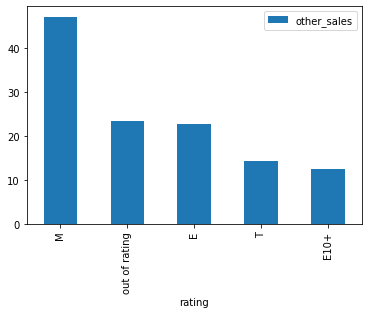

In [111]:
games[games['year_of_release'] > 2012].groupby(by='rating').agg({'other_sales': 'sum'}).sort_values(by='other_sales', ascending=False).head(6).plot(kind='bar')

In [112]:
other_rating = games[games['year_of_release'] > 2012].groupby('rating').agg({'other_sales': 'sum'}).reset_index()
other_rating.sort_values(by='other_sales',ascending=False).head(20)

,rating,other_sales
2,M,47.04
4,out of rating,23.46
0,E,22.61
3,T,14.29
1,E10+,12.57


<AxesSubplot:xlabel='rating', ylabel='na_sales'>

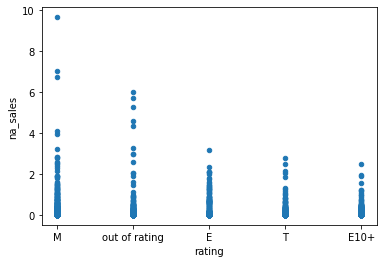

In [113]:
games[games['year_of_release'] > 2012].plot(x ='rating', y='na_sales', kind='scatter')

<AxesSubplot:xlabel='rating'>

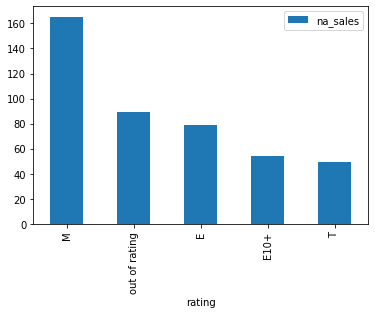

In [114]:
games[games['year_of_release'] > 2012].groupby(by='rating').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).head().plot(kind='bar')



In [115]:
na_rating = games[games['year_of_release'] > 2012].groupby('rating').agg({'na_sales': 'sum'}).reset_index()
na_rating.sort_values(by='na_sales',ascending=False).head(20)

,rating,na_sales
2,M,165.21
4,out of rating,89.42
0,E,79.05
1,E10+,54.24
3,T,49.79


<AxesSubplot:xlabel='rating', ylabel='eu_sales'>

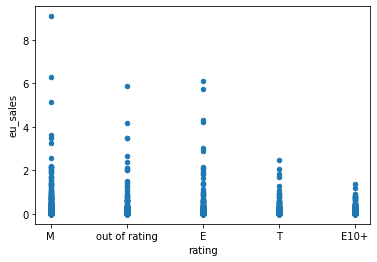

In [116]:
games[games['year_of_release'] > 2012].plot(x ='rating', y='eu_sales', kind='scatter')

<AxesSubplot:xlabel='rating'>

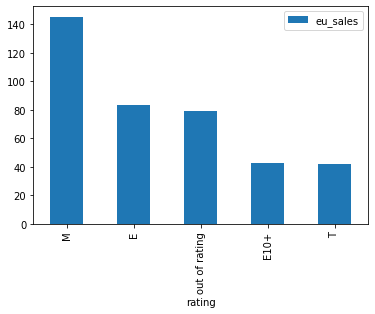

In [117]:
games[games['year_of_release'] > 2012].groupby(by='rating').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head().plot(kind='bar')

In [118]:
eu_rating = games[games['year_of_release'] > 2012].groupby('rating').agg({'eu_sales': 'sum'}).reset_index()
eu_rating.sort_values(by='eu_sales',ascending=False).head(20)

,rating,eu_sales
2,M,145.32
0,E,83.36
4,out of rating,78.91
1,E10+,42.69
3,T,41.95


<AxesSubplot:xlabel='rating', ylabel='jp_sales'>

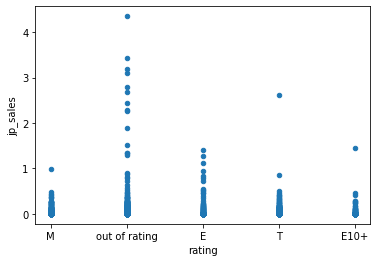

In [119]:
games[games['year_of_release'] > 2012].plot(x ='rating', y='jp_sales', kind='scatter')

<AxesSubplot:xlabel='rating'>

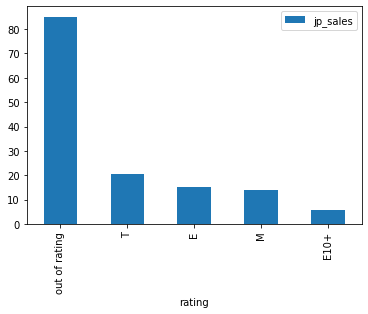

In [120]:
games[games['year_of_release'] > 2012].groupby(by='rating').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head().plot(kind='bar')

In [121]:
jp_rating = games[games['year_of_release'] > 2012].groupby('rating').agg({'jp_sales': 'sum'}).reset_index()
jp_rating.sort_values(by='jp_sales',ascending=False).head(20)

,rating,jp_sales
4,out of rating,85.05
3,T,20.59
0,E,15.14
2,M,14.11
1,E10+,5.89


Самая полуляркая категория по Рейтингу ESRB во всех регионах это M-от 17 лет, потом E-для всех, в Японии рейтинг ESRB вообще мало что значит.

# Шаг 5. 
Проверим гипотезы

-Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

-Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимые между собой.

ГИПОТЕЗЫ:

-H0:средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

-H1:средние пользовательские рейтинги платформ Xbox One и PC разные.

In [122]:
alpha = 0.05

In [123]:
xone = games[(games['platform'] == 'XOne') & (games['user_score'] > 0) & (games['year_of_release'] > 2012)]['user_score']
pc = games[(games['platform'] == 'PC') & (games['user_score'] > 0) & (games['year_of_release'] > 2012)]['user_score']

In [124]:
xone.mean()

6.521428571428572

In [125]:
pc.mean()

6.2696774193548395

In [126]:
# Комментарий ревьюера
len(xone), len(pc)

(182, 155)

In [127]:
results = st.ttest_ind(xone, pc)

print('р-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


ГИПОТЕЗЫ:

-H0:cредние пользовательские рейтинги жанров Action и Sports одинаковые;

-H1:средние пользовательские рейтинги жанров Action и Sports разные.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font>
<br><font color='Red'>🛠 Для анализа не используется актуальный период.</font>

In [128]:
action = games[(games['genre'] == 'Action') & (games['user_score'] > 0) & (games['year_of_release'] > 2012)]['user_score']
sports = games[(games['genre'] == 'Sports') & (games['user_score'] > 0) & (games['year_of_release'] > 2012)]['user_score']

In [129]:
alpha = 0.05

In [130]:
len(action), len(sports)

(389, 160)

In [131]:
results = st.ttest_ind(action, sports)
print('р-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


In [132]:
action.mean()

6.837532133676092

In [133]:
sports.mean()

5.238124999999999

# ОБЩИЙ ВЫВОД:

-Мы проанилизировали актуальные платформы, PS3, X360, XOne, 3DS, PS4 и среди них есть только  2, которые стремятся вверх к 2017 году,  это фаворит америки и Европы на момент нынешнего 2016 года PS4 и XOne, у них самые высокие показатели и по прогнозу будут только расти, тогда как остальные уже в конце своей популярности. Но в Японии любят 3DS.

Оценки критиков и пользователей по платформам, влияющие на покупку почти совпадают. От оценок зависят продажи.

-Проанализировав ТОП-5 платформ c 2012 года(так как нам нужно затронуть функцианирующие к 2017 году платформы) по странам, выделились 3 лидера PS4(Америка, Европа), XOne(Америка) и 3DS(лидер в Японии). Проанализировав ТОП-5 жанров с 2008 года, выделились 3 фаворита Shooter(США и Европа), Action(во всех), Role-Playing(1е место в Японии). 

-Проанализировав ТОП-5 платформ на нынешний 2016 год, по странам, выделились 3 лидера PS4(во всех странах), XOne(Америка и Европа) и 3DS(лидер в Японии). Проанализировав ТОП-5 жанров на 2016 год, выделились 4 фаворита Shooter(США и Европа), Action(во всех), Role-Playing(2е место в Японии),Sports(США,Европа) 

-Самая полуляркая категория по Рейтингу ESRB во всех регионах(кроме Японии) это M-от 17 лет и E-для всех. В Японии рейтинг ESRB вообще мало что значит.

Для рекламной компании в США и Европе я бы рекомендовала обратить внимание на платформы PS4 и  XOne(так как проанализировав все действующие платформы, эти 2 только начинают свой путь и средние показатели у них на данный год, предшественник 2017му, выше остальных, но для Европы и Америки я бы посоветовала еще обратить внимание на платформу PC, которая хоть и в меньшенстве баллов, но уже в ТОП-5, и быстро наберет обороты) с жанрами Shooter и Action,  с отзывыми критиков не меньше 57, отзывами пользователей не менее 5.5, с рейтингом ESRB (М,E).

Для рекламной компании в Японии стоит обратить внимание на платформу 3DS c жанрами Role-Playing и Action, отзывыми критиков не менее 57, отзывами пользователей не менее 6х, на рейтинг ESRB внимание для Японии уделять не нужно.
